# Importing the dependencies

In [1]:
# Load the needed libraries
import numpy as np
import pandas as pd

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [3]:
# Load the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection and processing

In [4]:
# Read CSV
carprice_df = pd.read_csv('car data.csv')

In [5]:
# Shape of the dataset
print('Number of rows: ',carprice_df.shape[0])
print('Number of columns: ',carprice_df.shape[1])

Number of rows:  301
Number of columns:  9


In [6]:
# Head and Tail of the data
carprice_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
# Info of the data
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Statistical measures (Describe) of the data
carprice_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Checking for missing values in each column
carprice_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Columns of the dataframe
carprice_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
# Checking the distribution of categorical columns

# Fuel Type
print(carprice_df.Fuel_Type.value_counts())
print('\n')

# Seller Type
print(carprice_df.Seller_Type.value_counts())
print('\n')

# Transmission
print(carprice_df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# Encoding the categorical columns

# Encoding 'Fuel_Type' column
carprice_df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding 'Seller_Type' column
carprice_df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding 'Transmission' column
carprice_df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [13]:
# Checking Head and Tail of the data again
carprice_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Exploratory Data Analysis

In [14]:
# Setting up for visualization
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

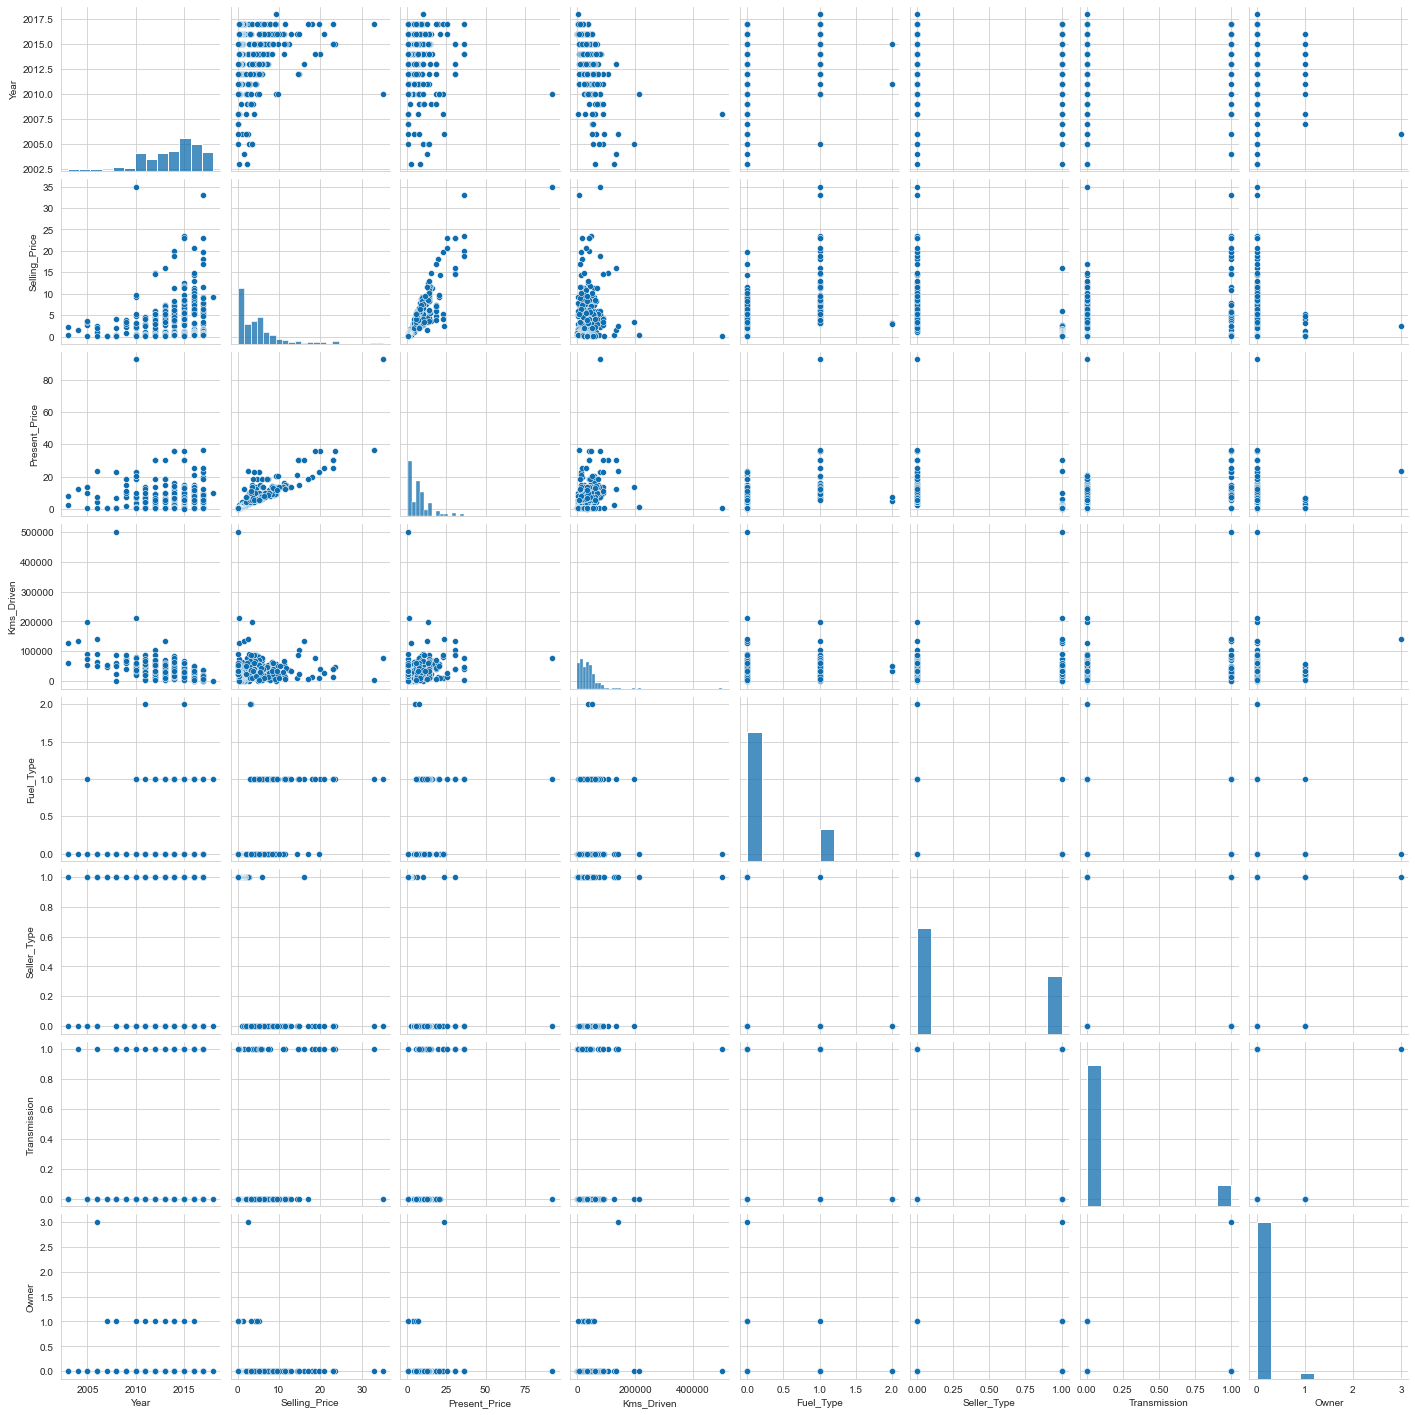

In [15]:
# PairPlot
sns.pairplot(carprice_df)

<AxesSubplot:>

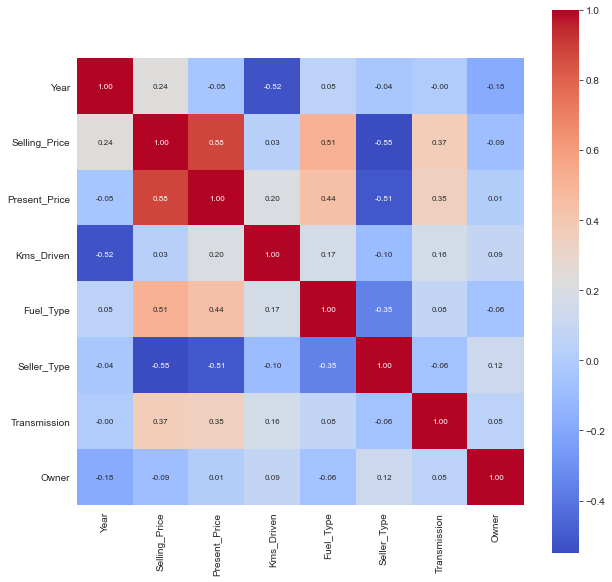

In [16]:
# HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(carprice_df.corr(), annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f', annot_kws={'size':8})

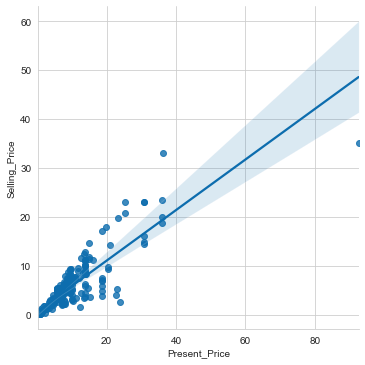

In [17]:
# Lmplot of present_price and selling_price
sns.lmplot(x='Present_Price', y='Selling_Price', data=carprice_df)

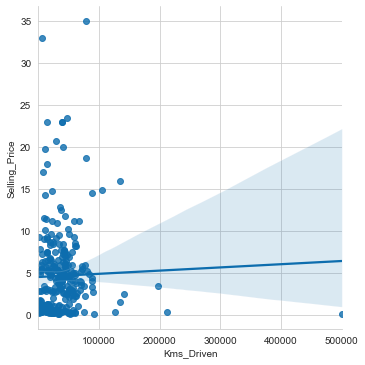

In [18]:
# Lmplot of kms_driven and selling_price
sns.lmplot(x='Kms_Driven', y='Selling_Price', data=carprice_df)

In [19]:
# Splitting the data and target(split to X and y)
X = carprice_df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = carprice_df['Selling_Price']

In [20]:
# Splitting Training and Test data(train_test_split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [21]:
# Model Training(Linear Regression)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
# Coefficient of the model
print('Coefficient: ',lin_reg.coef_)

Coefficient:  [ 4.09426126e-01  4.38728846e-01 -6.73100388e-06  1.76308349e+00
 -1.00417660e+00  1.50736348e+00 -8.74133473e-01]


In [23]:
# Prediction on Training data
training_data_prediction = lin_reg.predict(X_train)

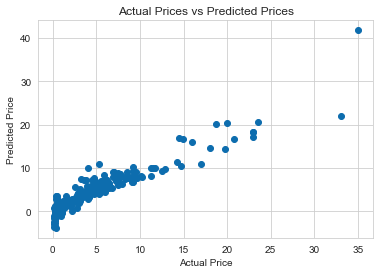

In [24]:
# ScatterPlot for the training data
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [25]:
# Regression Metric Library
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# R Squared Error
print('R Squared Error: ',r2_score(y_train, training_data_prediction))
print('\n')

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_train, training_data_prediction))
print('\n')

# Mean Squared Error
print('MSE: ',mean_squared_error(y_train, training_data_prediction))
print('\n')

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_train, training_data_prediction)))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_train, training_data_prediction))

R Squared Error:  0.87994516604937


MAE:  1.2166174093917996


MSE:  3.259030823309117


RMSE:  1.8052785999144612


Variance Score:  0.87994516604937


In [26]:
# Prediction on Test data
test_data_prediction = lin_reg.predict(X_test)

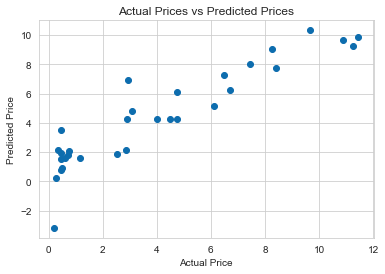

In [27]:
# ScatterPlot for the test data
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [28]:
# Regression Metric Library
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# R Squared Error
print('R Squared Error: ',r2_score(y_test, test_data_prediction))
print('\n')

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_test, test_data_prediction))
print('\n')

# Mean Squared Error
print('MSE: ',mean_squared_error(y_test, test_data_prediction))
print('\n')

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_test, test_data_prediction)))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_test, test_data_prediction))

R Squared Error:  0.8365766715024749


MAE:  1.1516382156622913


MSE:  2.150129918986658


RMSE:  1.4663321311990194


Variance Score:  0.8461547731813654


In [29]:
# CDF
cdf = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Year,0.409426
Present_Price,0.438729
Kms_Driven,-0.000007
Fuel_Type,1.763083
Seller_Type,-1.004177
Transmission,1.507363
Owner,-0.874133


In [30]:
# Model Training(Lasso Regression)
from sklearn.linear_model import Lasso
las_reg = Lasso()
las_reg.fit(X_train, y_train)

Lasso()

In [31]:
# Coefficient of the model
print('Coefficient: ',las_reg.coef_)

Coefficient:  [ 3.41436987e-01  5.09941877e-01 -6.89878945e-06  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [32]:
# Prediction on Training data
training_data_prediction1 = las_reg.predict(X_train)

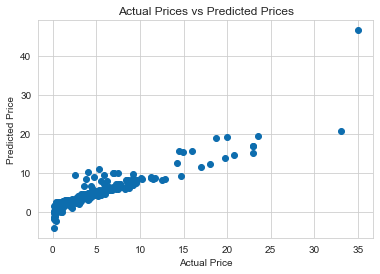

In [33]:
# ScatterPlot for the training data
plt.scatter(y_train, training_data_prediction1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [34]:
# Regression Metric Library
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# R Squared Error
print('R Squared Error: ',r2_score(y_train, training_data_prediction1))
print('\n')

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_train, training_data_prediction1))
print('\n')

# Mean Squared Error
print('MSE: ',mean_squared_error(y_train, training_data_prediction1))
print('\n')

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_train, training_data_prediction1)))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_train, training_data_prediction1))

R Squared Error:  0.8427856123435794


MAE:  1.2863097696916528


MSE:  4.267770970810246


RMSE:  2.0658584101555086


Variance Score:  0.8427856123435794


In [35]:
# Prediction on Test data
test_data_prediction1 = las_reg.predict(X_test)

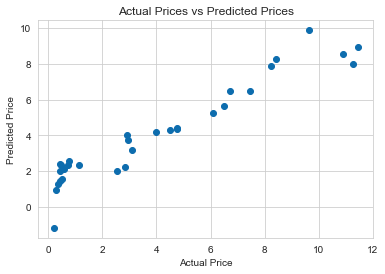

In [36]:
# ScatterPlot for the test data
plt.scatter(y_test, test_data_prediction1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [37]:
# Regression Metric Library
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# R Squared Error
print('R Squared Error: ',r2_score(y_test, test_data_prediction1))
print('\n')

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_test, test_data_prediction1))
print('\n')

# Mean Squared Error
print('MSE: ',mean_squared_error(y_test, test_data_prediction1))
print('\n')

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_test, test_data_prediction1)))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_test, test_data_prediction1))

R Squared Error:  0.8709167941173195


MAE:  1.0507413774170433


MSE:  1.6983234006965484


RMSE:  1.3031973759552113


Variance Score:  0.8714065264643474


In [38]:
# CDF
cdf = pd.DataFrame(las_reg.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Year,0.341437
Present_Price,0.509942
Kms_Driven,-0.000007
Fuel_Type,0.000000
Seller_Type,-0.000000
Transmission,0.000000
Owner,-0.000000
